In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
pd.options.display.max_rows = 999

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import seaborn as sns

#### Step 1: Make a data dictionary in Excel for review and notations 

In [3]:
df = pd.read_csv('C:/Users/rmbrm/Downloads/LoanStats_2015_v2/LoanStats_2015.csv', skiprows=1, low_memory=False) 


In [4]:
data_dictionary = pd.read_excel('C:/Users/rmbrm/Documents/DS_WP/Predict Default Final/LCDataDictionary.xlsx') 
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name',
                                                 'Description': 'description'})
df_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['name'] = df_dtypes['index']
df_dtypes = df_dtypes[['name','dtypes']]

df_dtypes['first value'] = df.loc[0].values
preview = df_dtypes.merge(data_dictionary, on='name',how='left')

preview.to_excel('C:/Users/rmbrm/Documents/DS_WP/Predict Default Final/variables2.xlsx')

153
['LoanStatNew', 'Description']


In [5]:
preview.head()

,name,dtypes,first value,description
0,id,object,NaN,A unique LC assigned ID for the loan listing.
1,member_id,float64,NaN,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,12000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,12000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,12000,The total amount committed by investors for that loan at that point in time.


#### Step 2: Initial data review and missing data visualizations
- Missing data visualization tool showed many features were almost entirely missing
- Missing data visualization tool showed several features had matching missing data
- I removed all features for which more than 50% of the data was missing.
- I removed two empty rows at the end of the dataframe
- I removed features that contained the same information as other features



In [6]:
loans_orig = df

In [7]:
loans_orig.shape

(421097, 145)

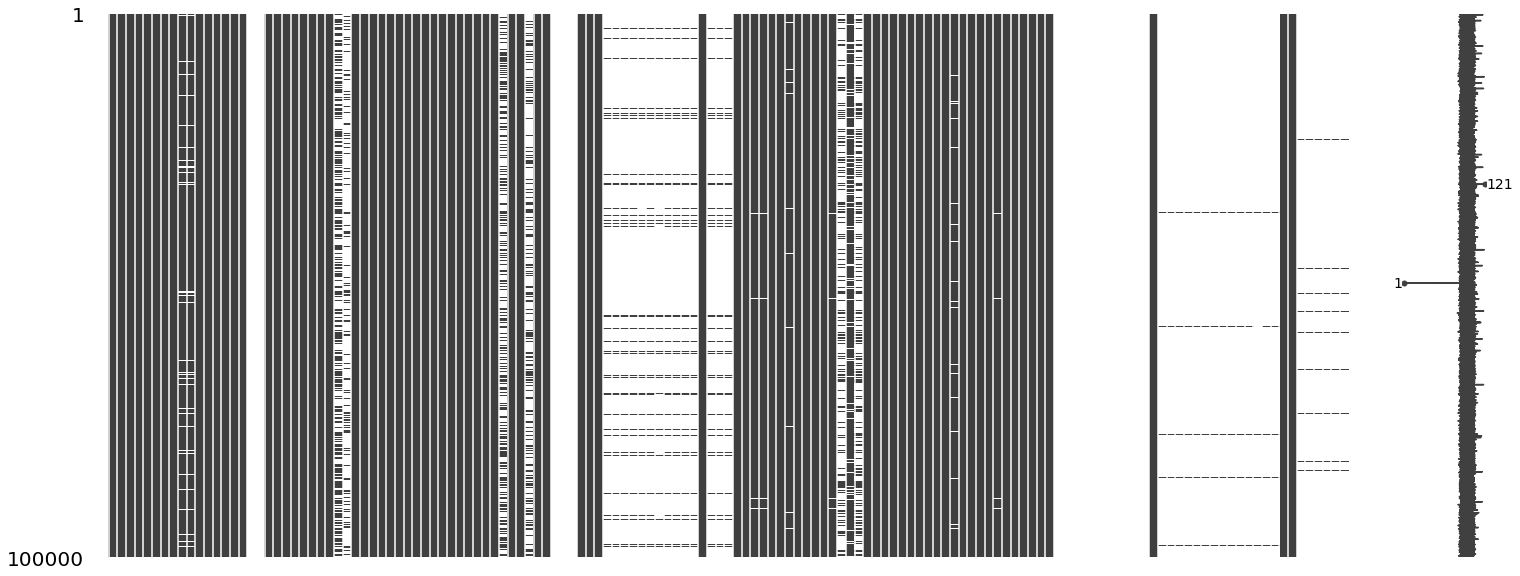

In [8]:
# 100,000
import missingno as msno
%matplotlib inline
msno.matrix(loans_orig.sample(100000))

###### Missing data visualization tool shows individual variables as columns, white is where data is missing. Shown are a low and high sampling rate. Variable names are not shown when there are more than 100.

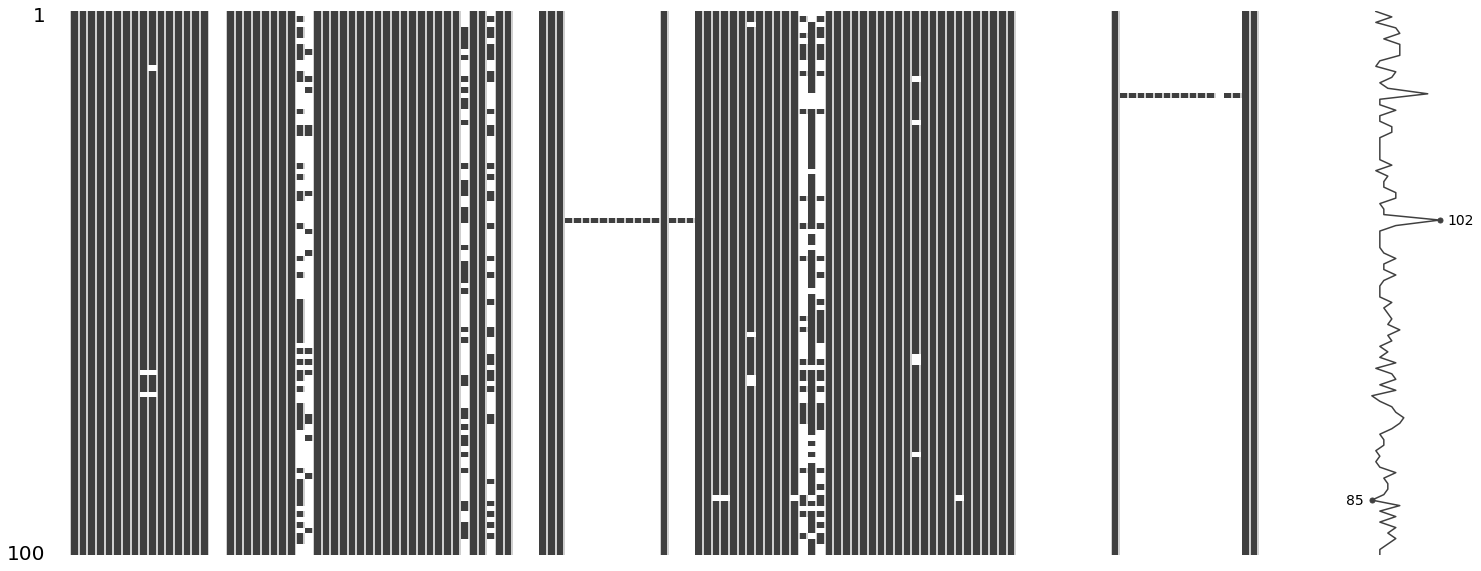

In [9]:
# 100
import missingno as msno
%matplotlib inline
msno.matrix(loans_orig.sample(100))

In [10]:
half_count = len(loans_orig) / 2
loans_abrdg = loans_orig.dropna(thresh=half_count,axis=1)

In [11]:
loans_abrdg.shape

(421097, 88)

In [12]:
missing = loans_orig.isnull().sum()
missing.sort_values(ascending=False)

sec_app_earliest_cr_line                      421097
revol_bal_joint                               421097
member_id                                     421097
url                                           421097
sec_app_inq_last_6mths                        421097
sec_app_mort_acc                              421097
sec_app_open_acc                              421097
sec_app_revol_util                            421097
sec_app_open_act_il                           421097
sec_app_num_rev_accts                         421097
sec_app_chargeoff_within_12_mths              421097
sec_app_collections_12_mths_ex_med            421097
sec_app_mths_since_last_major_derog           421097
id                                            421095
desc                                          421052
dti_joint                                     420588
annual_inc_joint                              420586
verification_status_joint                     420586
orig_projected_additional_accrued_interest    

In [13]:
# Remove empty rows at the end 
df = loans_abrdg
dfa = df.drop(df.index[421095])
dfb = dfa.drop(dfa.index[421095])
df = dfb


In [14]:
# ID features that have the same information
df['loan'] = np.where((df['loan_amnt'] == df['funded_amnt']) & (df['loan_amnt'] == df['funded_amnt_inv']), df['loan_amnt'], np.nan)

#### Step 3: Outliers
#### I first used the visualization library Plotly because it creates interactive boxplots, showing data values on hover, and allowing for zooming, panning, etc. Unfortunately, the data set was so big that only a few boxplots could be created in a single notebook. Therefore I recreated the boxplot using Seaborn. 

##### Takeaway: None of the outliers are problematic; the boxplots show many features with high-skewing distributions, which is not surprising, considering the variables.

In [15]:
time_vars = loans_orig[['mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']].copy()

In [16]:
time_fin = time_vars.rename(index=str, columns={'mo_sin_old_rev_tl_op': 'Oldest Revolving Account Opened', 'mo_sin_rcnt_rev_tl_op': 'Most Recent Revolving Account Opened', 'mo_sin_rcnt_tl': 'Most Recent Account Opened'})


In [17]:
acct_vars = loans_orig[['num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_tl_90g_dpd_24m', 'num_sats']].copy()

In [18]:
acct_fin = acct_vars.rename(index=str, columns={'num_accts_ever_120_pd': 'Accounts Ever 120 or More Days Past Due', 'num_actv_bc_tl': 'Currently Active Bankcard Accounts', 'num_actv_rev_tl': 'Currently Active Revolving Trades', 'num_bc_sats': 'Satisfactory Bankcard Accounts', 'num_tl_90g_dpd_24m': 'Accounts 90+ Days Past Due in Past 24 Months', 'num_sats': 'Satisfactory Accounts'})


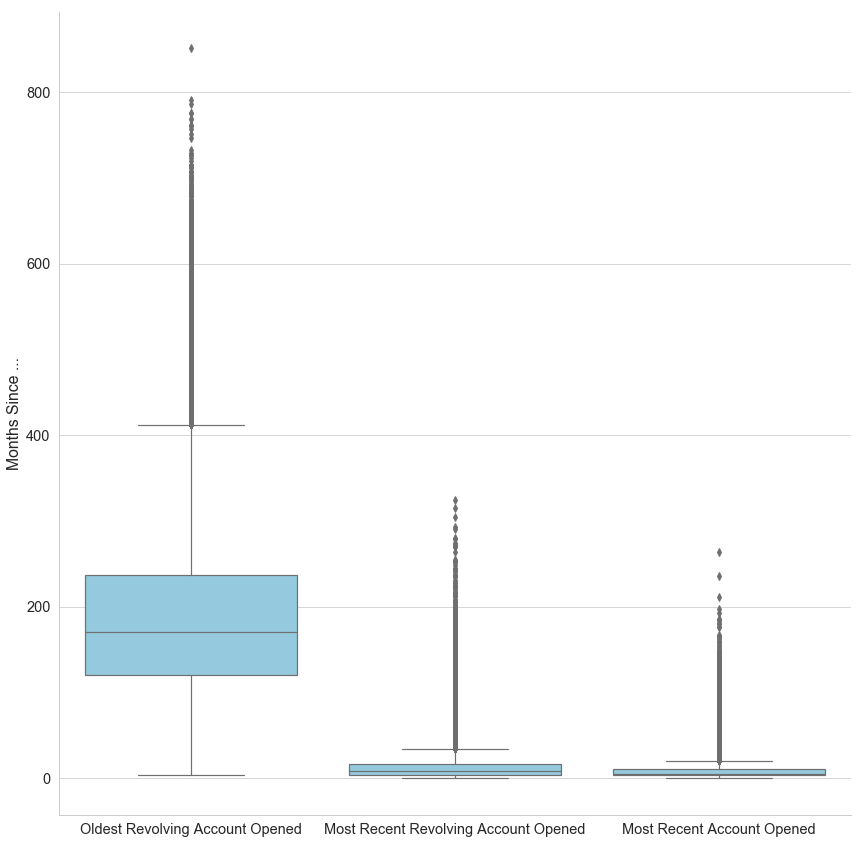

In [19]:
                                                                                                                                     
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.65) 
sns.catplot(kind='box',data=time_fin, height=12, color="skyblue")
plt.ylabel("Months Since ...")
#plt.xticks(rotation='80')
plt.show()

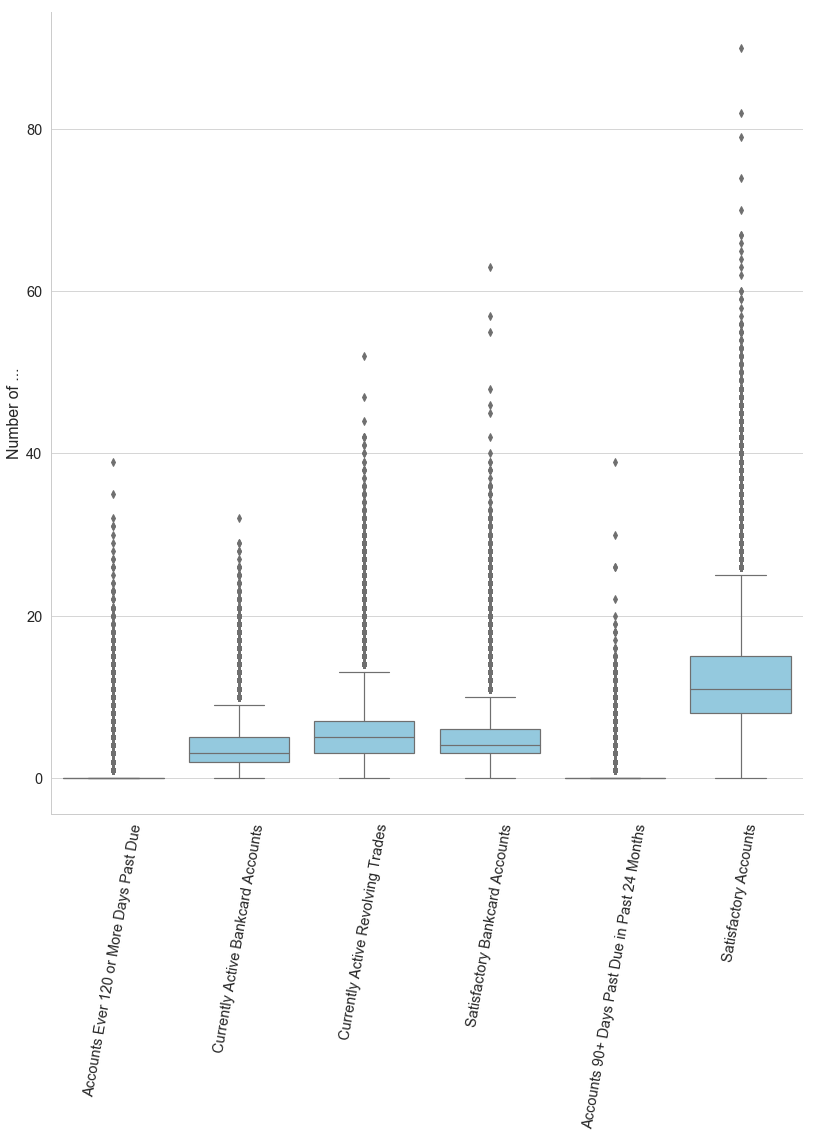

In [20]:
                                                                                                                                     
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.65) 
sns.catplot(kind='box',data=acct_fin, height=12, color="skyblue")
plt.ylabel("Number of ...")
plt.xticks(rotation='80')
plt.show()

#### What is the monthly average loan size?

In [21]:
mean = ((df.groupby('issue_d')['loan_amnt'].mean()))
mean.mean()

15260.90473809072

#### Step 4: Preprocessing
- strip out text to create numeric features
- recode text variables to create numeric features and target
- remove irrelevant features
- where some features have very few cases of a particular value, drop those cases
- remove "future leakage" features that were identified during review of data dictionary, features such as "debt_settlement_flag"

In [22]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan
0,12000.0,12000.0,12000.0,60 months,9.80%,253.79,B,B3,Teacher,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,660xx,KS,23.84,0.0,Nov-2003,0.0,NaN,18.0,0.0,9786.0,13.4%,37.0,w,0.00,0.00,13842.626405,13842.63,12000.00,1842.63,0.0,0.0,0.0,Nov-2017,8529.37,Nov-2017,0.0,1.0,Individual,0.0,0.0,181540.0,73200.0,8.0,10086.0,41055.0,17.1,0.0,0.0,127.0,145.0,4.0,1.0,2.0,4.0,14.0,0.0,2.0,4.0,5.0,10.0,13.0,11.0,22.0,4.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,291626.0,74787.0,49500.0,105910.0,N,Cash,N,12000.0
1,25000.0,25000.0,25000.0,36 months,5.32%,752.87,A,A1,Director,1 year,MORTGAGE,150000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,054xx,VT,9.54,0.0,Feb-1996,0.0,NaN,7.0,0.0,19339.0,42.5%,18.0,w,6628.03,6628.03,20257.290000,20257.29,18371.97,1885.32,0.0,0.0,0.0,Mar-2018,752.87,Aug-2017,0.0,1.0,Individual,0.0,0.0,430856.0,45500.0,1.0,61551.0,24661.0,44.0,0.0,0.0,166.0,238.0,4.0,4.0,7.0,73.0,NaN,0.0,1.0,1.0,3.0,3.0,4.0,4.0,7.0,1.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,512381.0,44786.0,44000.0,51081.0,N,Cash,N,25000.0
2,28000.0,28000.0,28000.0,60 months,18.49%,718.51,D,D5,Engineer,10+ years,MORTGAGE,75000.0,Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,471xx,IN,31.88,0.0,Oct-2002,0.0,NaN,27.0,0.0,43413.0,51.9%,46.0,w,18904.38,18904.38,18609.350000,18609.35,9095.62,9513.73,0.0,0.0,0.0,Mar-2018,718.51,Mar-2018,0.0,1.0,Individual,0.0,0.0,193745.0,83600.0,8.0,7176.0,23476.0,59.9,0.0,0.0,143.0,158.0,4.0,4.0,2.0,10.0,16.0,0.0,14.0,20.0,14.0,18.0,9.0,24.0,34.0,20.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,267312.0,57302.0,58500.0,31758.0,N,Cash,N,28000.0
3,30000.0,30000.0,30000.0,36 months,15.77%,1051.31,D,D1,Vice-President,2 years,MORTGAGE,175000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,Home improvement,430xx,OH,18.50,0.0,Aug-1997,1.0,61.0,9.0,0.0,21831.0,50.3%,23.0,w,0.00,0.00,33903.765739,33903.77,30000.00,3903.77,0.0,0.0,0.0,Dec-2016,23456.38,Sep-2017,0.0,1.0,Individual,0.0,0.0,408118.0,43400.0,7.0,51015.0,21569.0,50.3,0.0,0.0,118.0,220.0,16.0,6.0,3.0,16.0,0.0,0.0,2.0,2.0,3.0,7.0,9.0,4.0,11.0,2.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,447599.0,152571.0,43400.0,146568.0,N,Cash,N,30000.0
4,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,RN,< 1 year,RENT,44000.0,Verified,Dec-2015,Current,n,credit_card,NaN,322xx,FL,17.56,0.0,Jun-2006,0.0,NaN,7.0,0.0,12900.0,102.4%,25.0,w,12017.72,12017.72,12047.100000,12047.10,5582.28,6464.82,0.0,0.0,0.0,Mar-2018,465.22,Mar-2018,0.0,1.0,Individual,0.0,0.0,133285.0,12600.0,1.0,19041.0,0.0,102.4,0.0,0.0,112.0,114.0,25.0,13.0,0.0,25.0,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0

In [23]:
cols = ['term']

# pass them to df.replace(), specifying each char and its replacement:
df[cols] = df[cols].replace({' months': ''}, regex=True)

In [24]:
cols = ['int_rate', 'revol_util']
df[cols] = df[cols].replace({'%': ''}, regex=True)

In [25]:
cols = ['int_rate']
df[cols] = df[cols].replace({'%': ''}, regex=True)

In [26]:
cols = ['int_rate', 'revol_util']

df[cols] = df[cols].replace({' ': ''}, regex=True)

In [27]:
df["revol_util"] = df.revol_util.astype(float)

In [28]:
df["int_rate"] = df.int_rate.astype(float)

In [29]:
df["term"] = df.term.astype(float)

In [30]:
df.hardship_flag = df.hardship_flag.replace({"N": 0, "Y": 1})

In [31]:
df.grade = df.grade.replace({"A": 7, "B": 6, "C": 5, "D": 4, "E": 3, "F": 2, "G": 1})

In [32]:
df.emp_length = df.emp_length.replace({"10+ years": 10, "1 year": 1, "< 1 year": .5, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9})

In [33]:
df['default'] = df['loan_status']
recode = {'Fully Paid': 0, 'Current': 0, 'Charged Off': 1, 'Late (31-120 days)': 0, 'In Grace Period': 0, 'Late (16-30 days)': 0, 'Default': 1}
df['default'] = df['default'].apply(lambda x: recode[x])

In [34]:
drop_cols = ['funded_amnt', 'addr_state', 'debt_settlement_flag', 'loan_amnt', 'funded_amnt_inv', 'sub_grade', 'emp_title', 'issue_d', 'loan_status', 'pymnt_plan', 'last_pymnt_d', 'title', 'zip_code', 'earliest_cr_line', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code', 'application_type', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'delinq_amnt', 'mort_acc', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'disbursement_method', 'mths_since_last_delinq', 'mths_since_recent_inq', 'num_tl_120dpd_2m']

In [36]:
data_filtered = df.drop(drop_cols, axis=1)

In [37]:
data_filtered.shape 


(421095, 41)

In [38]:
data_filtered.to_pickle ("C:/Users/rmbrm/Documents/DS_WP/Predict Default Final/data_41_features", compression='infer', protocol=4)

In [39]:
df = data_filtered

In [40]:
df['verification_status'].value_counts()

Source Verified    179565
Verified           123016
Not Verified       118514
Name: verification_status, dtype: int64

In [41]:
df['purpose'].value_counts()

debt_consolidation    250020
credit_card           102025
home_improvement       25293
other                  19204
major_purchase          7449
medical                 3938
car                     3466
small_business          3364
moving                  2420
vacation                2249
house                   1438
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64

In [42]:
df['home_ownership'].value_counts()

MORTGAGE    207683
RENT        167644
OWN          45766
ANY              2
Name: home_ownership, dtype: int64

In [43]:
df = df[df.purpose != 'wedding']

In [44]:
df = df[df.purpose != 'educational']

In [45]:
df = df[df.purpose != 'renewable_energy']

In [46]:
df = df[df.home_ownership != 'ANY']

In [47]:
df.purpose = df.purpose.replace({"debt_consolidation": 1, "credit_card": 2, "home_improvement": 3, "other": 4, "major_purchase": 5, "medical": 6, "car": 7, "small_business": 8, "moving": 9, "vacation": 10, "house": 11})

In [48]:
df.verification_status = df.verification_status.replace({"Source Verified": 1, "Verified": 2, "Not Verified": 3})

In [49]:
df.home_ownership = df.home_ownership.replace({"MORTGAGE": 1, "RENT": 2, "OWN": 3})

In [50]:
df.to_pickle ("C:/Users/rmbrm/Documents/DS_WP/Predict Default Final/data_processed", compression='infer', protocol=4)

#### Step 5: Consider characteristics of the data and the goal of the project to formulate and implement a machine learning plan
- There is an abundance of features
- Start with an often effective algorithm that does not require feature scaling
- Start with an often effective algorithm that does not require one-hot encoding of categorical variables
- Run a random forests
- Investigate feature importance to see if features can be removed without having a great effect on prediction accuracy
- After removing features, try other algorithms to see if any are better than random forests

In [51]:
# random forests doesn't work with Nans so drop them
df = df.dropna()

In [52]:
df.shape

(353257, 41)

In [53]:
features = df.drop(df.columns[40], axis=1).values 
target = df['default'].values

In [54]:
type (features), type(target)

(numpy.ndarray, numpy.ndarray)

In [55]:
print(target)

[0 0 0 ... 1 1 0]


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [57]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score( X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.855


Feature ranking:
1. feature 1 (0.055704)
2. feature 9 (0.053665)
3. feature 21 (0.050536)
4. feature 20 (0.048768)
5. feature 14 (0.048501)
6. feature 36 (0.048256)
7. feature 17 (0.047604)
8. feature 37 (0.046606)
9. feature 18 (0.046562)
10. feature 2 (0.046482)
11. feature 6 (0.044978)
12. feature 24 (0.037501)
13. feature 39 (0.037408)
14. feature 22 (0.031886)
15. feature 12 (0.028952)
16. feature 23 (0.028895)
17. feature 28 (0.028862)
18. feature 32 (0.028551)
19. feature 4 (0.024233)
20. feature 27 (0.023739)
21. feature 3 (0.023469)
22. feature 33 (0.023331)
23. feature 26 (0.022585)
24. feature 31 (0.021235)
25. feature 8 (0.014769)
26. feature 11 (0.013367)
27. feature 25 (0.011782)
28. feature 7 (0.010973)
29. feature 10 (0.009862)
30. feature 5 (0.009736)
31. feature 13 (0.007246)
32. feature 0 (0.005698)
33. feature 34 (0.005409)
34. feature 30 (0.004193)
35. feature 35 (0.003527)
36. feature 15 (0.002571)
37. feature 19 (0.001272)
38. feature 16 (0.000715)
39. feature 29

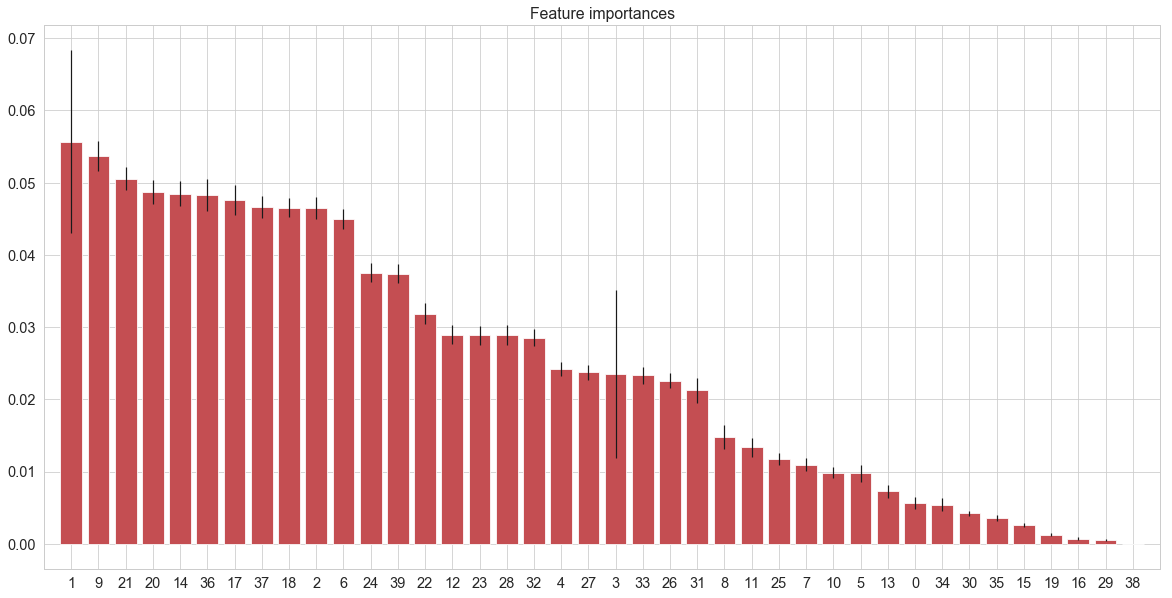

In [58]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [71]:
feature_list = df.dtypes

In [61]:
feature_list.to_excel('C:/Users/rmbrm/Documents/DS_WP/Predict Default Final/feature_list.xlsx')

In [62]:
bottom_20 = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag']

In [63]:
data_filtered = df.drop(bottom_20, axis=1)

In [64]:
df = data_filtered

In [65]:
df.shape

(353257, 21)

In [66]:
features = df.drop(df.columns[20], axis=1).values 
target = df['default'].values

In [67]:
type (features), type(target)

(numpy.ndarray, numpy.ndarray)

In [68]:
print(target)

[0 0 0 ... 1 1 0]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score( X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.853


Feature ranking:
1. feature 0 (0.082713)
2. feature 4 (0.066546)
3. feature 10 (0.062119)
4. feature 7 (0.060701)
5. feature 9 (0.059731)
6. feature 6 (0.059643)
7. feature 17 (0.059545)
8. feature 1 (0.058230)
9. feature 18 (0.057771)
10. feature 8 (0.057385)
11. feature 3 (0.054904)
12. feature 19 (0.044938)
13. feature 13 (0.044085)
14. feature 11 (0.036470)
15. feature 16 (0.036362)
16. feature 12 (0.033594)
17. feature 15 (0.033204)
18. feature 5 (0.033082)
19. feature 14 (0.030032)
20. feature 2 (0.028944)


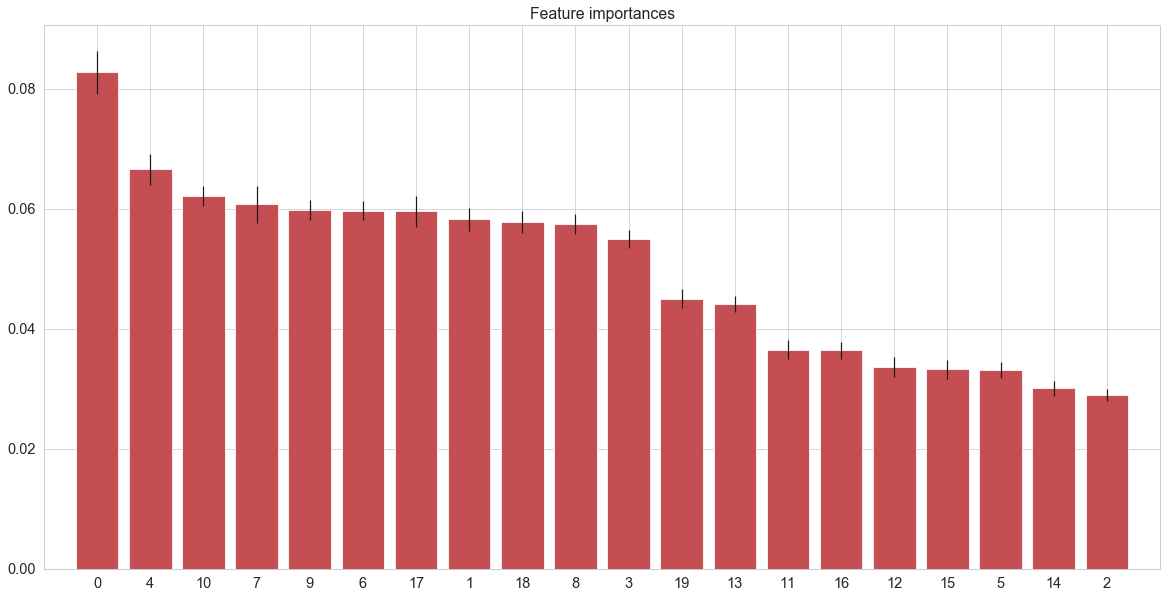

In [70]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [72]:
feature_list2 = df.dtypes

In [73]:
feature_list2.to_excel('C:/Users/rmbrm/Documents/DS_WP/Predict Default Final/feature_list2.xlsx')

In [74]:
bottom_9 = ['emp_length', 'open_acc', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'num_bc_sats', 'num_sats', 'pct_tl_nvr_dlq', 'loan']

In [75]:
data_filtered = df.drop(bottom_9, axis=1)

In [76]:
df = data_filtered

In [77]:
df.shape

(353257, 12)

In [78]:
features = df.drop(df.columns[11], axis=1).values 
target = df['default'].values

In [79]:
type (features), type(target)

(numpy.ndarray, numpy.ndarray)

In [80]:
print(target)

[0 0 0 ... 1 1 0]


In [81]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score( X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.853


Feature ranking:
1. feature 0 (0.100077)
2. feature 3 (0.099752)
3. feature 1 (0.091962)
4. feature 4 (0.091185)
5. feature 8 (0.091171)
6. feature 5 (0.090731)
7. feature 10 (0.090406)
8. feature 7 (0.088878)
9. feature 9 (0.088305)
10. feature 6 (0.086748)
11. feature 2 (0.080785)


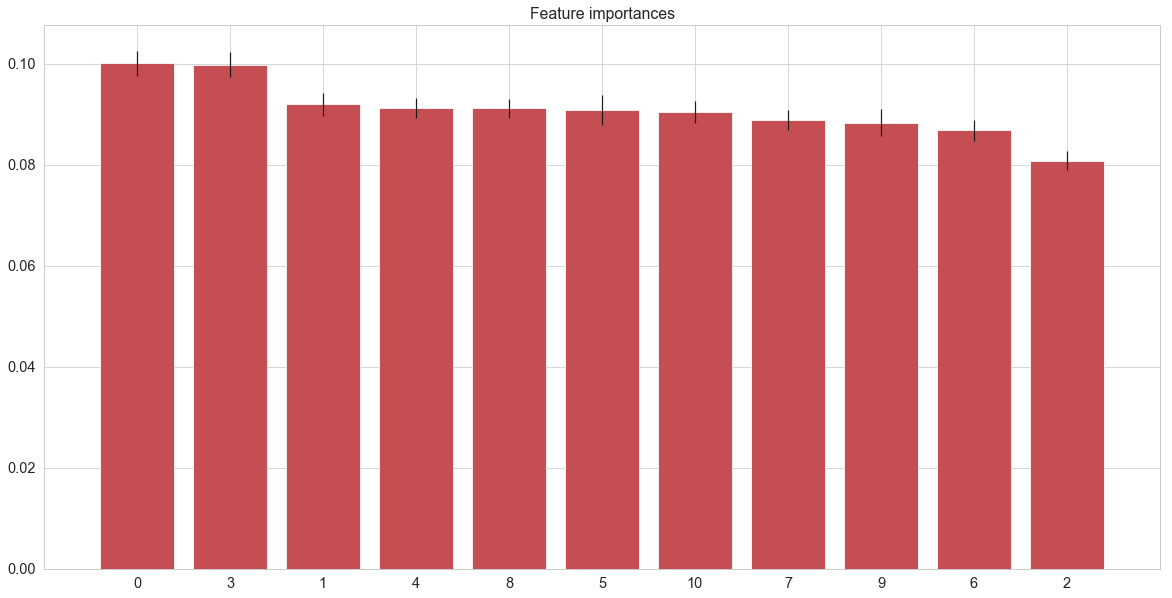

In [82]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [83]:
feature_list3 = df.dtypes

In [84]:
feature_list3.to_excel('C:/Users/rmbrm/Documents/DS_WP/Predict Default Final/feature_list3.xlsx')

In [85]:
bottom_6 = ['annual_inc', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'total_bc_limit', 'total_il_high_credit_limit']

In [86]:
data_filtered = df.drop(bottom_6, axis=1)

In [87]:
df = data_filtered

In [88]:
df.shape

(353257, 6)

In [89]:
features = df.drop(df.columns[5], axis=1).values 
target = df['default'].values

In [90]:
type (features), type(target)

(numpy.ndarray, numpy.ndarray)

In [91]:
print(target)

[0 0 0 ... 1 1 0]


In [92]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score( X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.853


Feature ranking:
1. feature 2 (0.236876)
2. feature 3 (0.226662)
3. feature 1 (0.199466)
4. feature 4 (0.199106)
5. feature 0 (0.137890)


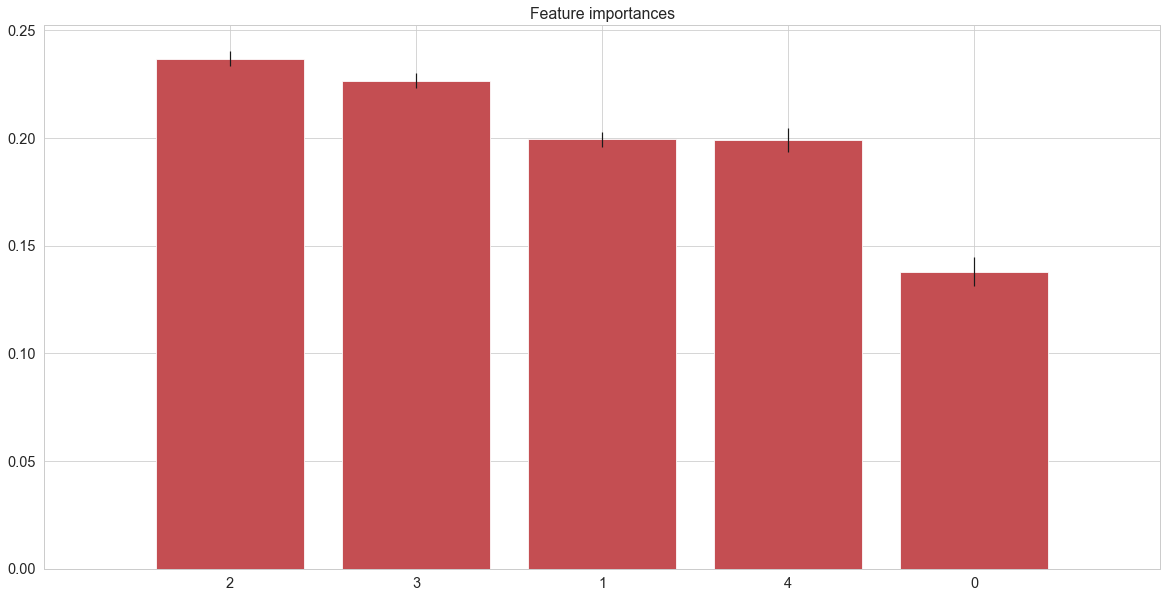

In [93]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Run the initial analysis with cross validation rather than just train/test split to ensure generalizability of model

In [3]:
df = pd.read_pickle("C:/Users/rmbrm/Documents/DS_WP/Predict Default Final/data_processed") 

In [4]:
# random forests doesn't work with Nans so drop them
df = df.dropna()

In [5]:
features = df.drop(df.columns[40], axis=1).values 
target = df['default'].values

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
scores = cross_val_score(forest, features, target)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Cross-validation scores: [0.85483172 0.85472858 0.8538114 ]
Average cross-validation score: 0.85


#### Next steps: Hyperparameter tuning, try additional algorithms